In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import datetime 
import re

# **Data Analysis of Gun-Crimes in America**
### R. Singh
### *7/12/2023 - 12/12/2023*

##### Given the recent shooting at the University of Nevada (https://edition.cnn.com/2023/12/08/us/university-of-nevada-las-vegas-shooting-friday/index.html) and the seemingly ever increasing rise of Gun Related Violence in the USA (https://abcnews.go.com/US/116-people-died-gun-violence-day-us-year/story?id=97382759#:~:text=The%20U.S.%20has%20surpassed%2039%2C000,44%2C310%20such%20deaths%20in%202022.); it is the aim of this notebook to conduct Exploratory Data Analysis on Gun related incidents in the USA & extract information for the viewer to come to their conclusions on the status of Gun Violence in the US.

### This Dataset was sourced from: https://www.kaggle.com/datasets/nidzsharma/us-mass-shootings-19822023

In [16]:
df=pd.read_csv(r"C:\Users\acer\Downloads\us_shooting-1982-2023.csv")

df.shape

(141, 21)

In [17]:
df = df[df['year']!=2023] 
# since data was updated <as of time of downloading of file> ~ in Apr-2023 >> full information for 2023 is not present
list(df.columns) # list of columns

['case',
 'location',
 'date',
 'summary',
 'fatalities',
 'injured',
 'total_victims',
 'location.1',
 'age_of_shooter',
 'prior_signs_mental_health_issues',
 'mental_health_details',
 'weapons_obtained_legally',
 'where_obtained',
 'weapon_type',
 'weapon_details',
 'race',
 'gender',
 'latitude',
 'longitude',
 'type',
 'year']

## *Shootings in the USA & their Locations*

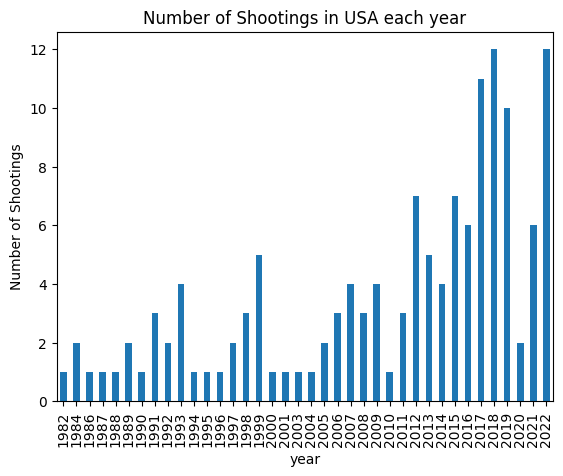

In [18]:
df['year'].value_counts().sort_index().plot(kind='bar',ylabel='Number of Shootings',title='Number of Shootings in USA each year')
plt.show()

In [19]:
print(df['location.1'].value_counts()) # some repeats of sorts > will modify w str modifications
df['location.1']=df['location.1'].apply(lambda x:x.strip().title())

location.1
Other          49
Workplace      45
School         20
Religious       7
Military        6
workplace       4
Other\n         3
religious       1
Airport         1
\nWorkplace     1
Name: count, dtype: int64


location.1
Other        52
Workplace    50
School       20
Religious     8
Military      6
Airport       1
Name: count, dtype: int64


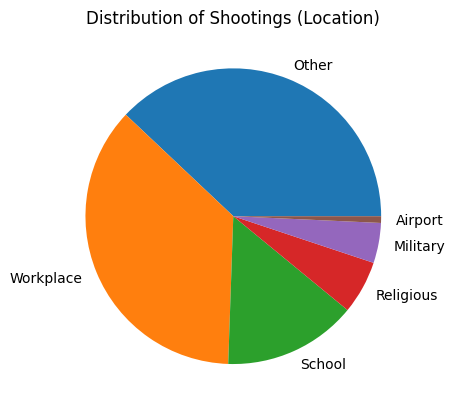

In [20]:
print(df['location.1'].value_counts()) # now appears to be clearer 

df['location.1'].value_counts().plot(kind='pie',ylabel='',title='Distribution of Shootings (Location)')
plt.show()

#### While the dataset may not capture every single shooting in the US; it does point to a clear trend of increasing cases of shootings, with a sizeable majority of them occuring in Workplace/School environments >> jeopardising the lives of everyday civilians; including students

## *Age Range & Distribution of the Shooters*

In [21]:
df[df['age_of_shooter']=='-'] 
# age of shooter column currently in string format owing to presence of NAs in the form of unknown age
# will investigate the age of the shooter to restore data

# info on Sacramento Church Shooting >> https://www.kcra.com/article/sacramento-church-father-kills-3-daughters-what-we-know/39302856 (Age >> 39)
# Jersey City Kosher market shooting >> summary indicates 2 shooters > age will be taken as rounded mean round((47+50)/2)>>49

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
15,Sacramento County church shooting,"Sacramento, California",2-28-22,"""A man believed to be meeting his three childr...",4,0,4,Religious,-,-,...,-,-,semiautomatic rifle,"AR-15-style ""ghost gun""",-,M,38.60111019,-121.4189659,Mass,2022
24,Jersey City kosher market shooting,"Jersey City, New Jersey",12-10-19,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,Other,-,-,...,-,-,semiautomatic rifle; shotgun; semiautomatic ha...,AR-15-style rifle; Mossberg 12-gauge shotgun; ...,Black,Male & Female,40.707363,-74.083609,Spree,2019


In [22]:
df.loc[15,'age_of_shooter']=39
df.loc[24,'age_of_shooter']=49

df['age_of_shooter']=df['age_of_shooter'].apply(lambda x:int(x)) # convert from str to int

Minimum Age: 11
Maximum Age: 70


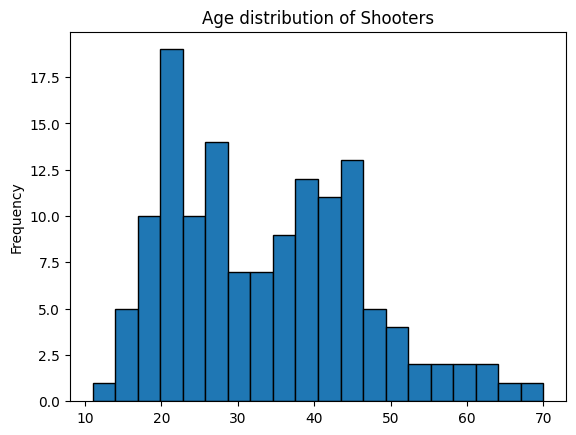

In [23]:
print("Minimum Age:",df['age_of_shooter'].min())
print("Maximum Age:",df['age_of_shooter'].max())
df['age_of_shooter'].plot(kind='hist',bins=20,edgecolor='black',title='Age distribution of Shooters') # peaks ard youths and middle aged people
plt.show()

#### While aged across a broad range; most shooters are typically youths in their early 20s or middle aged people in their mid 40s; suggesting the pressures of newfound responsibilities in adulthood as well as midlife crises could play a part in the commiting of such acts of violence; though this is by no means confirmative

## *Links Between Shootings and Mental Health*

In [24]:
df['prior_signs_mental_health_issues'].value_counts() # Likewise; data modification required to standardise yes, no and unclear outcomes

prior_signs_mental_health_issues
Yes         58
-           25
Unclear     23
No          17
yes          7
TBD          5
Unknown      1
Unclear      1
Name: count, dtype: int64

In [25]:
print('Confirmed Prior Mental_Health issues\n')
for r in df[df['prior_signs_mental_health_issues']=="Yes"]['summary'].sample(5).values:
    print(r)
print('\nConfirmed NO Prior Mental_Health issues\n')
for r in df[df['prior_signs_mental_health_issues']=="No"]['summary'].sample(5).values:
    print(r)

### Initial aim to derive meaningful data from the summary column proves difficult; owing to how limited the information is on
### reasoning behind the violent act; with no explicitly clear difference between cases where prior mental health issues have been confirmed
### and cases where prior mental health issues have been confirmed to NOT be the case

Confirmed Prior Mental_Health issues

Day trader Mark O. Barton, 44, who had recently lost a substantial sum of money, went on a shooting spree through two day-trading firms. He started at the All-Tech Investment Group, where he worked, then went on to Momentum Securities. He fled and hours later, after being cornered by police outside a gas station, committed suicide. (Two days before the spree, he killed his wife and two children with a hammer.)
Colin Ferguson, 35, opened fire on an eastbound Long Island Rail Road train as it approached a Garden City station. He was later arrested.
Living Church of God member Terry Michael Ratzmann, 44, opened fire at a church meeting at a Sheraton hotel before committing suicide.
Robert Stewart, 45, opened fire at a nursing home where his estranged wife worked before he was shot and arrested by a police officer.
John T. Miller, 50, killed four child-support workers in a county office building before turning the gun on himself.  Miller was upset abou

In [26]:
df['prior_signs_mental_health_issues']=df['prior_signs_mental_health_issues'].apply(lambda x:x.title().strip()) 
# standardise Yes and No's and all
unclear_mental_health=df[~(df['prior_signs_mental_health_issues'].isin(['Yes','No']))] 
# for '-' / 'Unclear' instances; may have some evidence to support
# Will break into 3 cases > Low)/ High and Unknown << no evidence can be sourced at all>>
unclear_lis=list(map(lambda x:f"https://en.wikipedia.org/w/index.php?search={x[0]} {x[1]}",zip(unclear_mental_health['case'],unclear_mental_health['date'])))

In [31]:
# function to help uncover likelihood of mental health problems which shooter may have had that influenced the shooting
# will derive this information from online sources >> centralised at Wikipedia for ease of analysis
# keywords used are in the local 'ids' variable >> based on personal research and could be modified to better identify mental health issues
def check_mental_health(url):
    r=requests.get(url)
    soup=BeautifulSoup(r.text,'html.parser')
    print(url)
    try:
        url_ref=(soup.find(class_='mw-search-result-ns-0').find('a')['href'])
    except Exception:
        return None
    if len(url_ref)==0:
        return None
    else:
        url2='https://en.wikipedia.org/'+url_ref
        r2=requests.get(url2)
        soup=BeautifulSoup(r2.text,'html.parser')
        try:
            text=(' '.join(list(map(lambda x:x.text.strip(),soup.find(class_='mw-body-content').findAll('p')))).strip().lower())
        except Exception:
            return None
        ids=['mental health','mental illness','mental-health','mental-illness','suicide','self-inflicted'] 
        # identifying keywords used to determine if mental health played an issue or not
        #  > note that they are explicit and in some ways subjective; can be improved on based on other considerations
        dic=({i:text.count(i) for i in ids})
        return sum(dic.values())/len(dic.values())


In [32]:
print(len(unclear_lis))
res=list(map(lambda x:check_mental_health(x),unclear_lis))
set(res) 
# if any word is present > will take it as H >> 0 means Low but not completely impossible (could have other factors not uncovered/
# other keywords not used) - None means no evidence can be found and will thus be Unknown

likelihood=list(map(lambda v:'Unknown' if v==None else 'High' if v>0 else 'Low',res))
index=0
for i,r in unclear_mental_health.iterrows():
    df.loc[i,'prior_signs_mental_health_issues'] = likelihood[index]
    index+=1

55
https://en.wikipedia.org/w/index.php?search=Virginia Walmart shooting 11-22-22
https://en.wikipedia.org/w/index.php?search=University of Virginia shooting 11-13-22
https://en.wikipedia.org/w/index.php?search=Raleigh spree shooting 10-13-22
https://en.wikipedia.org/w/index.php?search=Greenwood Park Mall shooting 7-17-22
https://en.wikipedia.org/w/index.php?search=Highland Park July 4 parade shooting 7-4-22
https://en.wikipedia.org/w/index.php?search=Church potluck dinner shooting 6-16-22
https://en.wikipedia.org/w/index.php?search=Concrete company shooting 6-9-22
https://en.wikipedia.org/w/index.php?search=Tulsa medical center shooting 6-1-22
https://en.wikipedia.org/w/index.php?search=Sacramento County church shooting 2-28-22
https://en.wikipedia.org/w/index.php?search=Oxford High School shooting 11-30-21
https://en.wikipedia.org/w/index.php?search=Orange office complex shooting 3-31-21
https://en.wikipedia.org/w/index.php?search=Atlanta massage parlor shootings 3-16-21
https://en.w

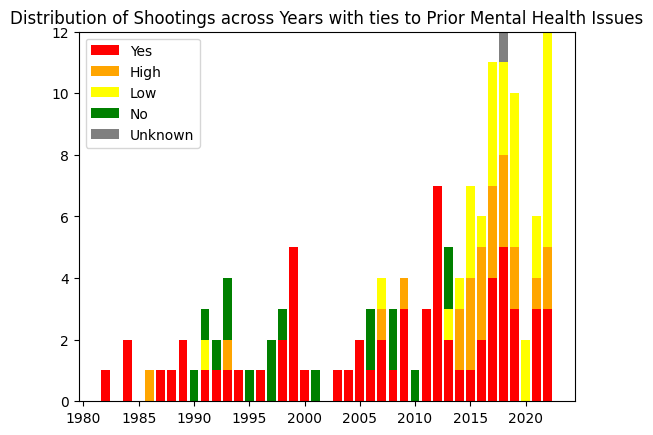

In [33]:
plt.figure()
mental_health_prob = ['Yes','High','Low','No','Unknown']
color=['Red','Orange','Yellow','Green','Gray']
x_col='year'
init=([0]* len(range(df[x_col].min(),df[x_col].max()+1)))
for i,k in enumerate(mental_health_prob):
    pf=df[df['prior_signs_mental_health_issues']==k][[x_col,'prior_signs_mental_health_issues']].groupby(x_col).count().reset_index()
    vals=([list(pf['prior_signs_mental_health_issues'].values)[list(pf[x_col].values).index(i)] \
           if i in pf[x_col].values else 0 for i in range(df[x_col].min(),df[x_col].max()+1)])
    plt.bar(list(range(df[x_col].min(),df[x_col].max()+1)),vals,color=color[i],bottom=init,label=mental_health_prob[i])
    init=[x+vals[i] for i,x in enumerate(init)]
plt.legend()
plt.title("Distribution of Shootings across Years with ties to Prior Mental Health Issues")
plt.show()

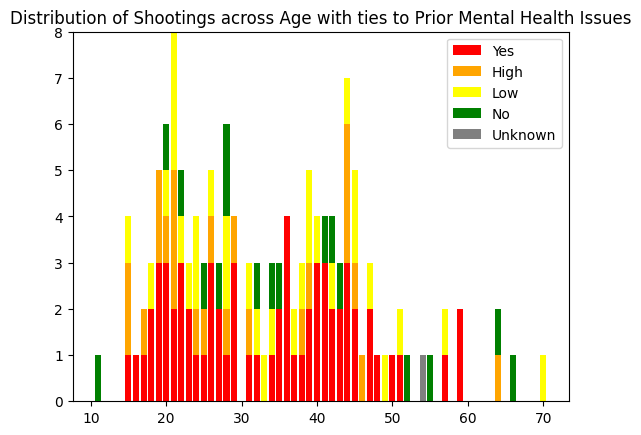

In [34]:
plt.figure()
mental_health_prob = ['Yes','High','Low','No','Unknown']
color=['Red','Orange','Yellow','Green','Gray']
x_col='age_of_shooter'
init=([0]* len(range(df[x_col].min(),df[x_col].max()+1)))
for i,k in enumerate(mental_health_prob):
    pf=df[df['prior_signs_mental_health_issues']==k][[x_col,'prior_signs_mental_health_issues']].groupby(x_col).count().reset_index()
    vals=([list(pf['prior_signs_mental_health_issues'].values)[list(pf[x_col].values).index(i)] \
           if i in pf[x_col].values else 0 for i in range(df[x_col].min(),df[x_col].max()+1)])
    plt.bar(list(range(df[x_col].min(),df[x_col].max()+1)),vals,color=color[i],bottom=init,label=mental_health_prob[i])
    init=[x+vals[i] for i,x in enumerate(init)]
plt.legend()
plt.title("Distribution of Shootings across Age with ties to Prior Mental Health Issues")
plt.show()

<Axes: title={'center': '% Distributon of Prior Mental Health Issues to Shootings'}>

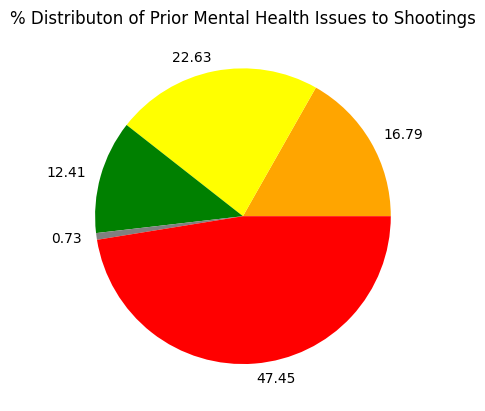

In [35]:
gf = df.groupby('prior_signs_mental_health_issues')['prior_signs_mental_health_issues'].value_counts()
dic=dict(zip(mental_health_prob,color))

gf.plot(kind='pie',ylabel='',colors=(gf.index.map(dic)),labels=map(lambda x:round(x,2),(gf.values/gf.sum()*100)),title='% Distributon of Prior Mental Health Issues to Shootings')

#### While it is not definitive that cases with 'High'/ 'Low' likelihoods of Mental Health issues are tantamount to Yes/No mental health issues respectively, what is clear is the significant proportion of such cases being linked to people with prior mental health issues as well as the decrease in the number of cases in recent years of people confirmed to NOT have any prior mental health issues. Indeed questions on the confirmation of people with 'NO prior mental health issues' can als be raised based on the extensiveness of the investigation conducted - especially for cases in the 90s when a focus on such issues could be presumed to be low < though admittedly speculative >. Futhermore, the broadness of ties to prior mental health issues amongst all age groups highlights how this issue is not solely limited to a specific demographic of people

## *Number of people killed/ injured by each State/Territory*

In [36]:
print(sorted(df['location'].apply(lambda x:x.split(',')[-1].strip()).unique())) # state-wise, looks distinct and legitimate

df['state'] = df['location'].apply(lambda x:x.split(',')[-1].strip())

['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'D.C.', 'Florida', 'Georgia', 'Hawaii', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Lousiana', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'Nevada', 'New Jersey', 'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Washington', 'Wisconsin']


In [37]:
for e in df[['fatalities','injured','total_victims']]:
    print(f"Column name - {e:<15}: {df[e].dtype}") 
    if str(df[e].dtype)=='object':
        print(df[~df[e].apply(lambda x:x.isdigit())][e])
# so injured and total victims columns have non integer values >> ID'd by the object dtype
# 1 row specifically >> row w index 12 >> value of "TK" 


Column name - fatalities     : int64
Column name - injured        : object
12    (TK - "fewer than 10"
Name: injured, dtype: object
Column name - total_victims  : object
12    TK
Name: total_victims, dtype: object


In [38]:
df[df.index==12] # Tulsa Medical Shooting 2022 >> not much information on number of injuries
# since injured col claims fewer than 10, will assume 8 ppl were injured >> any other reasonable number can also be assumed

df.loc[12,'injured'] = 8 
df.loc[12,'total_victims'] = df.loc[12,'injured'] + df.loc[12,'fatalities']

In [39]:
df['injured']=df['injured'].apply(int)
df['total_victims']=df['total_victims'].apply(int)

## verify that sum of injured ppl and fatalities gives proper number of total_victims 
all(df['injured']+df['fatalities']==df['total_victims']) # yep, all summations add up ;}

True

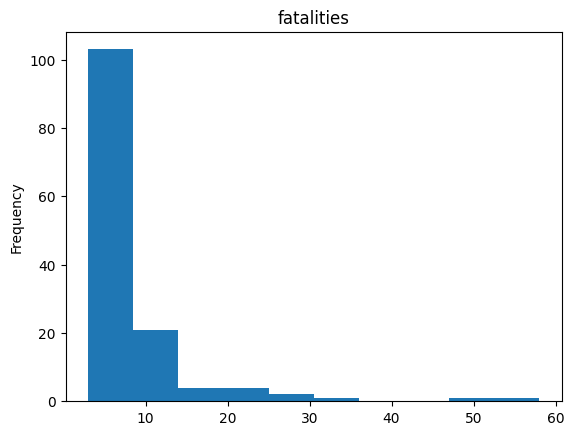

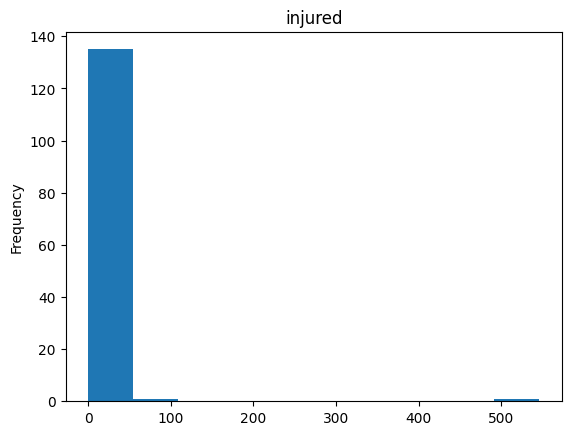

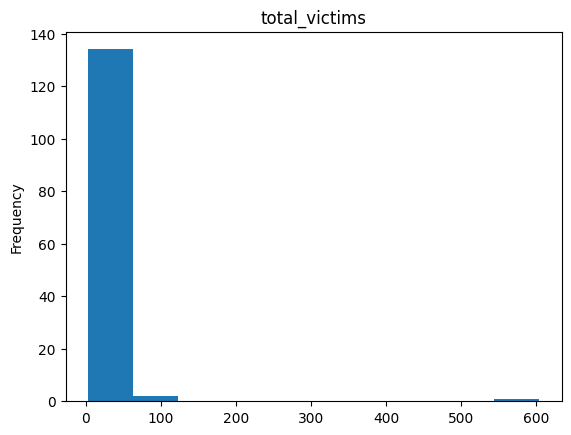

In [40]:
for e in df[['fatalities','injured','total_victims']]:
    df[e].plot(kind='hist',title=e)
    plt.show() # possible outliers present in fatalities and total_victims columns

In [41]:
df[df['total_victims']>500]
# possibly a low count of the actual number of deaths (according to different sources)

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year,state
50,Las Vegas Strip massacre,"Las Vegas, Nevada",10-1-17,"Stephen Craig Paddock, 64, fired a barrage of ...",58,546,604,Other,64,High,...,Two gun shops in Nevada,"23 firearms, mostly rifles; including scopes, ...","AR-15-style and AK-47-style rifles and ""a larg...",White,M,36.095739,-115.171544,Mass,2017,Nevada


### Horrific: https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting

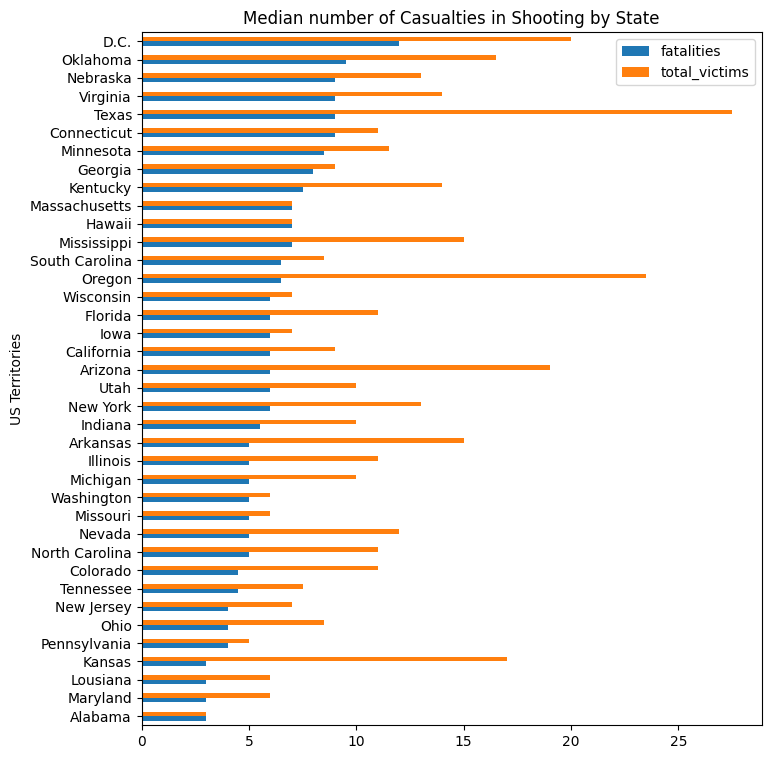

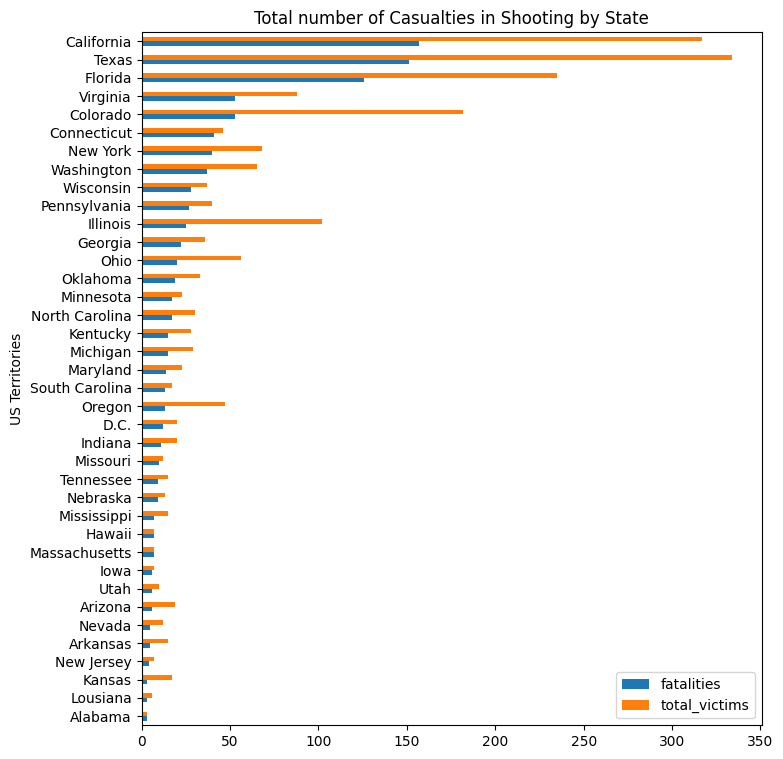

In [42]:
# to investigate the distributions of deaths and victims in shootings by states
# will remove the Nevada massacre owing to how absolutely insane that is in comparison >> however still remains a key reminder to the importance
# of gyn safety
sort_by = 'fatalities'

df_bal = df[df.index!=50]
df_bal[['state','fatalities','total_victims']].groupby('state').median().sort_values(sort_by).plot(kind='barh',figsize=(8,9),
ylabel='US Territories',title='Median number of Casualties in Shooting by State')
plt.show()

df_bal[['state','fatalities','total_victims']].groupby('state').sum().sort_values(sort_by).plot(kind='barh',figsize=(8,9),
ylabel='US Territories',title='Total number of Casualties in Shooting by State')
plt.show()
## DC > some capital eyyy; Texas >> lot of victims unsurprisingly. Alabama truly be a sweet home eh ;}
## Bear in mind however the 2017 Nevada mass shooting has been excluded owing to how it can skew the data for Nevada; yet it is extremely serious

## *Types (Mass vs Spree) Shootings*
#### https://www.thoughtco.com/defining-mass-spree-and-serial-killers-973123

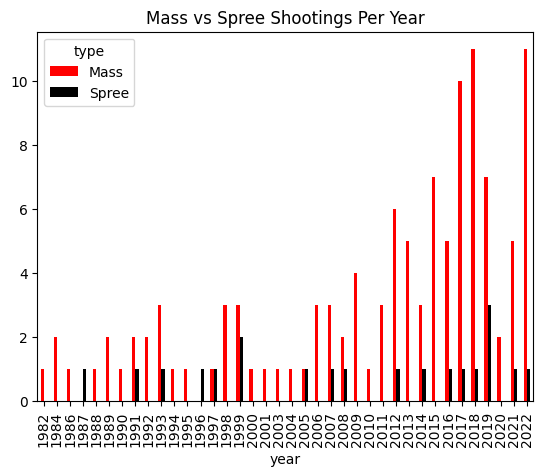

In [43]:
df.groupby(['year','type']).count()['location'].reset_index().pivot(columns='type',index='year',values='location').fillna(0).plot(
    kind='bar',title='Mass vs Spree Shootings Per Year',color=['red','black'])
plt.show()

### Will have to investigate the semantics between a mass and spree shooting - decided to highlight this for extra information

## *Number of Days between Shootings*

In [44]:
print(df['date'].unique()) # 2 types of datetime formats present >> M-D-YY & DD-MM-YYYY 
def to_datetime(s):
    y_part = s.split('-')[-1]
    if len(y_part)>2:
        return datetime.datetime.strptime(s,'%d-%m-%Y')
    else:
        return datetime.datetime.strptime(s,'%m-%d-%y')
df['datetime']=df['date'].apply(to_datetime) # converted into a standard YYYY-MM-DD datetime format

['11-22-22' '11-19-22' '11-13-22' '10-13-22' '7-17-22' '7-4-22' '6-16-22'
 '6-9-22' '6-1-22' '5-24-22' '5-14-22' '2-28-22' '11-30-21' '5-26-21'
 '4-15-21' '3-31-21' '3-22-21' '3-16-21' '3-16-20' '2-26-20' '12-10-19'
 '12-6-19' '8-31-19' '8-4-19' '8-3-19' '7-28-19' '5-31-19' '2-15-19'
 '1-24-19' '1-23-19' '11-19-18' '11-7-18' '10-27-18' '9-20-18' '9-12-18'
 '9-6-18' '6-28-18' '5-18-18' '4-22-18' '3-9-18' '2-14-18' '1-28-18'
 '11-14-17' '11-5-17' '11-1-17' '10-18-17' '10-1-17' '6-14-17' '6-7-17'
 '05-06-2017' '12-05-2017' '18-04-2017' '06-01-2017' '23-09-2016'
 '17-07-2016' '07-07-2016' '12-06-2016' '25-02-2016' '20-02-2016'
 '02-12-2015' '27-11-2015' '31-10-2015' '01-10-2015' '16-07-2015'
 '17-06-2015' '11-06-2015' '24-10-2014' '23-05-2014' '03-04-2014'
 '20-02-2014' '16-09-2013' '26-07-2013' '07-06-2013' '21-04-2013'
 '13-03-2013' '14-12-2012' '27-09-2012' '05-08-2012' '20-07-2012'
 '20-05-2012' '02-04-2012' '21-02-2012' '12-10-2011' '06-09-2011'
 '08-01-2011' '03-08-2010' '29-11-2009'

In [45]:
year_info=list(df['datetime'].sort_values().values)

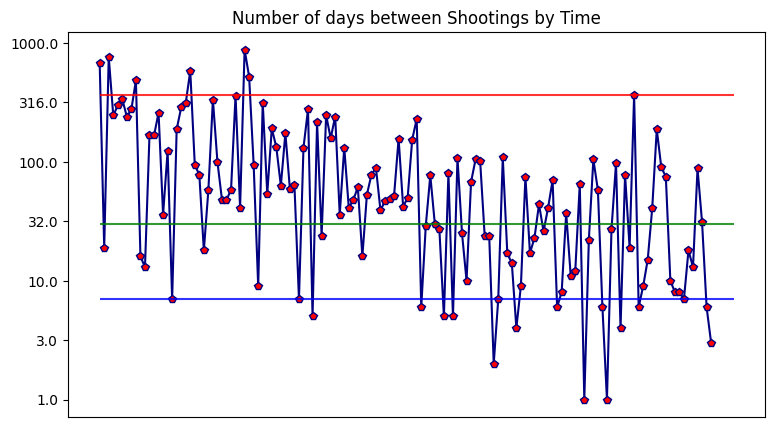

In [46]:
day_diff_btw_shootings=[(year_info[i+1]-e).astype('timedelta64[D]')/ np.timedelta64(1, 'D') for i,e in enumerate(year_info[:-1])]
plt.figure(figsize=(9,5))
plt.plot(np.log10(np.array(day_diff_btw_shootings)),color='navy',marker='p',mfc='red')
plt.title('Number of days between Shootings by Time')
plt.hlines(list(map(lambda x:np.log10(x),[365,30,7])),min(plt.xticks()[0][1:]),max(plt.xticks()[0][:-1]),colors=['red','green','blue'],alpha=0.8)
# red line is 1 year (365 days) ; green line is 1 month (30 days) & blue line is 1 week (7 days)
plt.xticks([])
y_labs=list(map(lambda x:round(x,0),(10**np.array(plt.yticks())[0])))[1:-1]
ticks=plt.yticks()[0][1:-1]
plt.yticks(ticks,labels=y_labs)
plt.show()

#### One of the more damning pieces of evidence in my opinion which highlights the frequency of Gun-Violent crimes being committed over the years from the 1980s to 2022; with points below the red line meaning that the time between 2 consecutive gun-violent crimes has been less than a year; points below the green line meaning that the time between 2 consecutive gun-violent crimes has been less than a month (30 days) and points below the blue line meaning that the time between 2 consecutive gun-violent crimes has been less than a week. The clear downward trend in the plot emphasises how the number of gun-violent crimes have grown exponentially - to the point where notable cases have occured virtually days apart from one another.

## Weapon Analysis

In [47]:
df['weapons_obtained_legally']=df['weapons_obtained_legally'].apply(lambda x:x.strip().title())

In [48]:
df['weapons_obtained_legally'].value_counts()

weapons_obtained_legally
Yes                                                                                                                                    92
No                                                                                                                                     16
-                                                                                                                                      14
Tbd                                                                                                                                     7
Unknown                                                                                                                                 6
Kelley Passed Federal Criminal Background Checks; The Us Air Force Failed To Provide Information On His Criminal History To The Fbi     1
Yes ("Some Of The Weapons Were Purchased Legally And Some Of Them May Not Have Been")                                                   1
Name: cou

In [49]:
def get_gun(s):
    def replace_alphanum(s):
        nums=['one','two','three','four','five']
        for e in range(5):
            s=s.replace(nums[e],'') 
        return s.strip()
    s=s.strip()
    lis=list(map(lambda x:x[:-1] if x[-1]=='s' else x, # get rid of plurals
    map(lambda x:replace_alphanum(x),map(lambda x:x.strip().lower(),re.split(' and|;|, ',s))))) # get rid of one/ two 
    return lis

guns=(list(map(lambda x:get_gun(x),df['weapon_type'].values)))
print(guns)
weapons=[]
for e in guns:
    weapons+=e

[['semiautomatic handgun'], ['semiautomatic rifle', 'semiautomatic handgun'], ['semiautomatic pistol'], ['shotgun', 'semiautomatic handgun'], ['semiautomatic rifle', 'semiautomatic handgun'], ['semiautomatic rifle'], ['semiautomatic handgun'], ['semiautomatic handgun'], ['semiautomatic rifle', 'semiautomatic handgun'], ['semiautomatic rifle'], ['semiautomatic rifle'], ['semiautomatic rifle'], ['semiautomatic handgun'], ['semiautomatic handgun'], ['semiautomatic rifle'], ['semiautomatic handgun'], ['semiautomatic rifle', 'semiautomatic handgun', 'tactical vest'], ['semiautomatic handgun'], ['semiautomatic rifle', 'semiautomatic handgun'], ['semiautomatic handgun'], ['semiautomatic rifle', 'shotgun', 'semiautomatic handgun'], ['semiautomatic handgun'], ['semiautomatic rifle'], ['semiautomatic rifle'], ['semiautomatic rifle'], ['semiautomatic rifle'], ['2 handgun'], ['handgun'], ['handgun'], ['handgun'], ['semiautomatic handgun'], ['semiautomatic handgun'], ['semiautomatic rifle', 'semiau

In [50]:
more_than_one_possibly=list(filter(lambda x:len(x)>1,guns))
more_than_one_possibly
# looks at cases where more than 1 TYPE of firearm is used - nt quantity
# As a result - instances listed below aren't to be counted in having more than 1 type of firerarm to be used
'''
['23 firearm', # same type of firearm
  'mostly rifle',
  'including scope',
  'and  modified for "fully automatic" firing',
  'were mounted on tripod']
['semi-automatic handgun', 'hunting knive'], # not 2 guns >> weapons yes but not guns
['handgun', 'a butcher knife']  
'''
print("Percentage of Shootings with more than 1 type of firearm used:",round((len(more_than_one_possibly)-3)/len(guns)*100,2),'%')

Percentage of Shootings with more than 1 type of firearm used: 37.96 %


In [51]:
dic={}
for k in weapons:
    if k not in dic:
        dic[k]=1
    else:
        dic[k]+=1 
sorted(dic.items(),key=lambda x:x[-1],reverse=True) 
# popular guns include  (semi-auto) handguns (pistols and revolvers), (semi-auto) rifles & shotguns 

[('semiautomatic handgun', 76),
 ('semiautomatic rifle', 27),
 ('shotgun', 26),
 ('revolver', 16),
 ('handgun', 14),
 ('rifle', 13),
 ('rifle (assault)', 12),
 ('assault rifle', 2),
 ('derringer', 2),
 ('semiautomatic handguns ( assault)', 2),
 ('semiautomatic pistol', 1),
 ('tactical vest', 1),
 ('2 handgun', 1),
 ('.38 revolver', 1),
 ('23 firearm', 1),
 ('mostly rifle', 1),
 ('including scope', 1),
 ('and  modified for "fully automatic" firing', 1),
 ('were mounted on tripod', 1),
 ('semi-automatic pistols were used in the attack. police found a remote controlled explosive device at the scene of the crime. at the home were 12 pipe bomb',
  1),
 ('2,500 rounds for the ar-15 variant', 1),
 ('2,000 rounds for the pistol', 1),
 ("and several hundred for a .22 calibre rifle. in the suspects' car were an additional 1,400 rounds for the rifle",
  1),
 ('200 for the handguns.', 1),
 ('a rifle', 1),
 ('pistol', 1),
 ('magazines of ammunition', 1),
 ('2 assault rifle', 1),
 ('semi-automatic h

#### With most guns being fairly simple firearms (ones not specialised/ leaning towards a more militaristic role); the question on the ease of access for such guns should be called into question; especially when considering the prior information on the number of people who commit such acts having prior mental health issues; as opposed to the outright ban of all guns - especially when considering that other countries that allow for the sale of similar firearms do not suffer from such cases (https://www.ch.ch/en/safety-and-justice/owning-a-weapon-in-switzerland/#which-weapons-require-which-permits)

## Sex and Race Data

In [52]:
print(df['gender'].unique()) # fair to assume M & F are acronyms of sorts; but for both Male & Female

df[df['gender']=='Male & Female'] # cases where both a man and woman were involved in shooting
# https://en.wikipedia.org/wiki/2019_Jersey_City_shooting
# https://en.wikipedia.org/wiki/2015_San_Bernardino_attack

['M' 'Male & Female' 'F' 'Male' 'Female']


,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_type,weapon_details,race,gender,latitude,longitude,type,year,state,datetime
24,Jersey City kosher market shooting,"Jersey City, New Jersey",12-10-19,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,Other,49,Low,...,semiautomatic rifle; shotgun; semiautomatic ha...,AR-15-style rifle; Mossberg 12-gauge shotgun; ...,Black,Male & Female,40.707363,-74.083609,Spree,2019,New Jersey,2019-12-10
63,San Bernardino mass shooting,"San Bernardino, California",02-12-2015,Syed Rizwan Farook left a Christmas party held...,14,21,35,Workplace,28,High,...,Two assault rifles and two semi-automatic pist...,Two semiautomatic AR-15-style rifles—one a DPM...,Other,Male & Female,34.075961,-117.27789,Mass,2015,California,2015-12-02


In [53]:
df['gender']=df['gender'].str.replace('Male','M')
df['gender']=df['gender'].str.replace('Female','F')

print(df['gender'].unique())

['M' 'M & F' 'F']


In [54]:
print("Number of Shootings involving Males:",len(df[df['gender'].str.contains('M')]))
print("Number of Shootings involving Females:",len(df[df['gender'].str.contains('F')])) # heavily imbalanced w a LOT more shooters being men

Number of Shootings involving Males: 134
Number of Shootings involving Females: 5


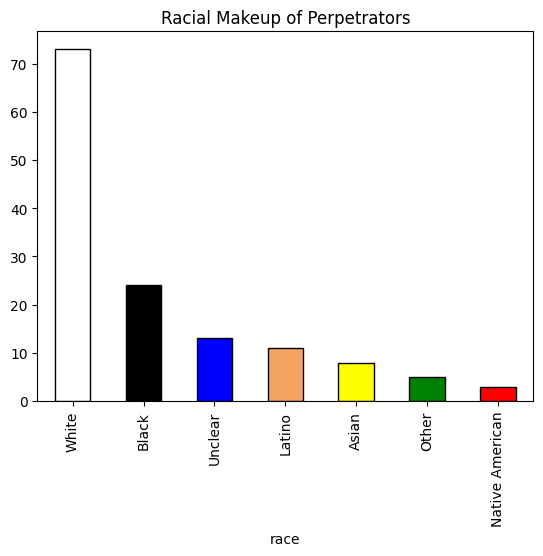

In [55]:
df['race']=df['race'].str.strip()
df['race']=df['race'].str.title()
df['race']=df['race'].str.replace('-','Unclear') # races not listed termed as unclear
df['race'].value_counts().plot(kind='bar',color=['white','black','blue','sandybrown','yellow','green','red'],edgecolor='black',title='Racial Makeup of Perpetrators')
plt.show()

#### While the imbalance of crimes involving males and females is clear; the myth of Blacks being significantly more violent than Whites is clearly shutdown by the graph above 

### Overall, the data supports the debunking of a number of commonly held myths (https://www.everytown.org/debunking-gun-myths-at-the-dinner-table/) & highlights the need for more stringent measures to be implemented in the US; particularly with regards to the accessibilty of guns to the youth and those with mental health issues which can result in such individuals causing the deaths of numerous innocent people